In [8]:
import torch
print(torch.cuda.is_available())

True


In [9]:
!pip install kaggle

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets list

ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset  Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000           6454        251  1.0              
jaderz/hospital-beds-management                               Hospital Beds Management                                47583  2025-10-03 09:21:58.590000           5207        145  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024          BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          11576        249  1.0              
grandmaster07/s

In [12]:
import os
import shutil

os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

In [13]:
!kaggle competitions download -c dogs-vs-cats

 99% 800M/812M [00:07<00:00, 244MB/s]
100% 812M/812M [00:07<00:00, 112MB/s]


In [14]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [15]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [16]:
train_dataset = '/content/train.zip'

with ZipFile(train_dataset, 'r') as zip:
  zip.extractall()
  print("The training dataset is extracted")

The training dataset is extracted


In [17]:
import os

path, dirs, files =  next(os.walk("/content/train"))
file_count = len(files)
print(file_count)

25000


In [18]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.211.jpg', 'cat.12334.jpg', 'dog.7392.jpg', 'cat.10643.jpg', 'cat.1316.jpg', 'dog.5086.jpg', 'cat.1173.jpg', 'cat.2484.jpg', 'dog.9462.jpg', 'cat.12259.jpg', 'cat.552.jpg', 'cat.8999.jpg', 'dog.2266.jpg', 'cat.5400.jpg', 'dog.4101.jpg', 'cat.4281.jpg', 'cat.2210.jpg', 'cat.6891.jpg', 'dog.5121.jpg', 'dog.4924.jpg', 'dog.5589.jpg', 'dog.10124.jpg', 'cat.9025.jpg', 'dog.754.jpg', 'dog.4483.jpg', 'dog.10875.jpg', 'dog.4474.jpg', 'cat.8665.jpg', 'cat.11083.jpg', 'cat.8221.jpg', 'cat.2422.jpg', 'cat.6101.jpg', 'cat.6262.jpg', 'dog.8446.jpg', 'cat.2249.jpg', 'dog.5147.jpg', 'dog.2229.jpg', 'dog.6006.jpg', 'cat.6209.jpg', 'dog.10137.jpg', 'dog.4592.jpg', 'cat.9710.jpg', 'dog.7189.jpg', 'dog.5539.jpg', 'dog.9170.jpg', 'dog.4903.jpg', 'dog.2016.jpg', 'dog.2116.jpg', 'dog.8835.jpg', 'dog.1116.jpg', 'cat.1199.jpg', 'dog.10382.jpg', 'cat.11136.jpg', 'dog.5083.jpg', 'cat.11679.jpg', 'dog.9640.jpg', 'cat.9809.jpg', 'dog.7440.jpg', 'cat.284.jpg', 'cat.9782.jpg', 'dog.3100.jpg', 'dog.10719.jpg', 

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

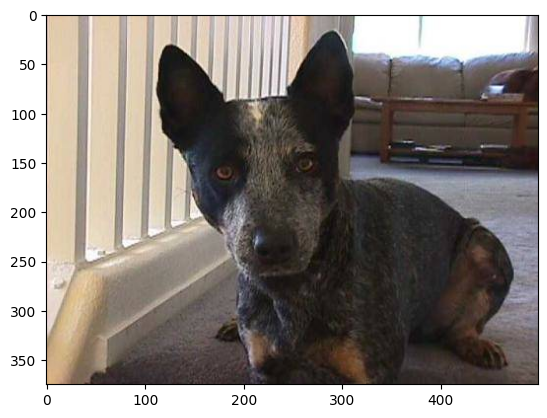

In [20]:
img = mpimg.imread('/content/train/dog.11859.jpg')
imgplt = plt.imshow(img)
plt.show()

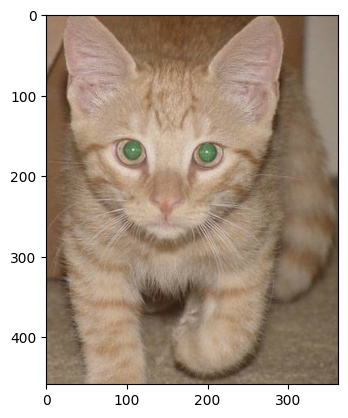

In [21]:
img = mpimg.imread('/content/train/cat.2641.jpg')
imgplt = plt.imshow(img)
plt.show()

In [22]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print(f'No of dogs : {dog_count}')
print(f'No of cats : {cat_count}')

No of dogs : 12500
No of cats : 12500


In [23]:
os.mkdir('/content/image resized')

In [24]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  file_name = os.listdir(original_folder)[i]
  img_path = original_folder + file_name

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  img.save(resized_folder + file_name)

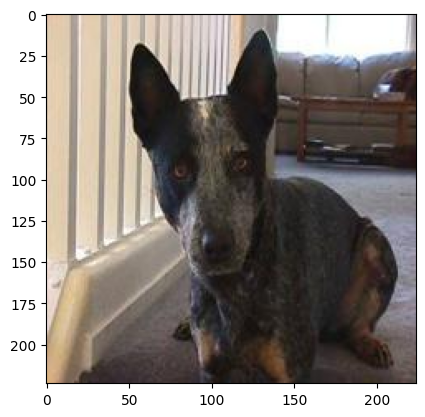

In [25]:
img = mpimg.imread('/content/image resized/dog.11859.jpg')
imgplt = plt.imshow(img)
plt.show()

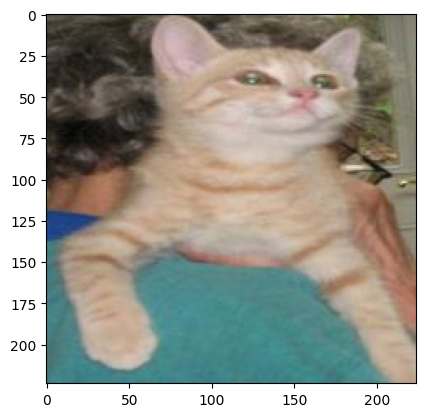

In [26]:
img = mpimg.imread('/content/image resized/cat.8002.jpg')
imgplt = plt.imshow(img)
plt.show()

In [27]:
file_names = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [39]:
print(file_names[0:5])
print(len(file_names))

['cat.211.jpg', 'cat.12334.jpg', 'dog.7392.jpg', 'cat.10643.jpg', 'cat.1316.jpg']
2000


In [40]:
print(labels[0:50])
print(len(labels))

[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
2000


In [41]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1011  989]


In [42]:
import cv2
import glob

In [45]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [46]:
print(dog_cat_images)

[[[[140 154 126]
   [141 155 127]
   [143 157 129]
   ...
   [225 234 244]
   [194 203 213]
   [164 173 183]]

  [[143 157 129]
   [144 158 130]
   [144 158 130]
   ...
   [224 233 243]
   [206 215 225]
   [190 199 209]]

  [[147 161 133]
   [147 161 133]
   [147 161 133]
   ...
   [214 223 233]
   [205 214 224]
   [200 209 219]]

  ...

  [[163 164 185]
   [162 163 184]
   [164 165 186]
   ...
   [190 197 222]
   [188 195 220]
   [185 192 217]]

  [[189 189 213]
   [184 184 208]
   [185 185 209]
   ...
   [184 191 216]
   [182 189 214]
   [180 187 212]]

  [[198 198 222]
   [179 179 203]
   [164 164 188]
   ...
   [183 190 215]
   [183 190 215]
   [184 191 216]]]


 [[[129 146 135]
   [131 149 136]
   [132 152 139]
   ...
   [142 156 154]
   [143 156 154]
   [143 156 154]]

  [[128 145 134]
   [130 148 135]
   [131 151 138]
   ...
   [145 159 157]
   [143 156 154]
   [151 164 162]]

  [[127 144 133]
   [130 148 135]
   [131 151 138]
   ...
   [151 165 163]
   [151 164 162]
   [154 167

In [47]:
type(dog_cat_images)

numpy.ndarray

In [48]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [49]:
X = dog_cat_images
y = np.asarray(labels)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [53]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [54]:
X_train_scaled

array([[[[0.3372549 , 0.32941176, 0.40784314],
         [0.34117647, 0.33333333, 0.41176471],
         [0.34901961, 0.34117647, 0.41960784],
         ...,
         [0.3372549 , 0.16862745, 0.08627451],
         [0.35294118, 0.16862745, 0.08627451],
         [0.35294118, 0.16862745, 0.08235294]],

        [[0.3372549 , 0.32941176, 0.40784314],
         [0.34117647, 0.33333333, 0.41176471],
         [0.34901961, 0.34117647, 0.41960784],
         ...,
         [0.34117647, 0.17254902, 0.09803922],
         [0.34901961, 0.17254902, 0.09019608],
         [0.35686275, 0.17254902, 0.08627451]],

        [[0.3372549 , 0.32941176, 0.40784314],
         [0.34117647, 0.33333333, 0.41176471],
         [0.35294118, 0.34509804, 0.42352941],
         ...,
         [0.34509804, 0.17647059, 0.10196078],
         [0.35294118, 0.17647059, 0.09411765],
         [0.35294118, 0.17647059, 0.09411765]],

        ...,

        [[0.21960784, 0.44313725, 0.31372549],
         [0.27058824, 0.49803922, 0.36078431]

In [55]:
import tensorflow as tf
import tensorflow_hub as hub

In [80]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [84]:
import tensorflow as tf

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [85]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [90]:
model.fit(X_train_scaled, y_train, epochs=5)

In [90]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

In [90]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')